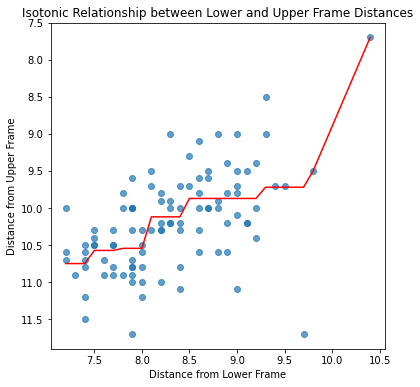

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.isotonic import IsotonicRegression

# Read CSV file
df = pd.read_csv('bank2.dat', delimiter='\s+')
columns = ["1", "2", "3", "4", "5", "6"]
df.columns = columns
df = df.iloc[:100, :]
distance_lower = df['4']
distance_upper = df['5']

# Perform isotonic regression
# The distance to the upper frame should decrease as the distance to the lower frame increases, hence we use a minus sign
iso_reg = IsotonicRegression(increasing=False)  # Set to False as we expect the relationship to be monotonically decreasing
distance_upper_fitted = iso_reg.fit_transform(distance_lower, distance_upper)

# Visualize original data and isotonic fit
plt.figure(figsize=(6, 6))
plt.scatter(distance_lower, distance_upper, alpha=0.7, label='Original Data')
# Pair X and Y and sort them by X
points = sorted(zip(distance_lower, distance_upper_fitted))

# Unpack the sorted pairs
distance_lower, distance_upper_fitted = zip(*points)
plt.plot(distance_lower, distance_upper_fitted, color='red', label='Isotonic Fit')
plt.title('Isotonic Relationship between Lower and Upper Frame Distances')
plt.xlabel('Distance from Lower Frame')
plt.ylabel('Distance from Upper Frame')
plt.gca().invert_yaxis()  # Invert the y-axis since the distance to the upper frame should decrease as the distance to the lower frame increases
#plt.legend()
#plt.grid(True)
plt.savefig("eyeopen.png", transparent = True)
plt.show()
